# Дипломная работа

### 1 Загрузить файл hr.csv (можно найти во сложении к заданию)

In [101]:
import pandas as pd
import numpy as np
from scipy.stats import t, norm
import matplotlib.pyplot as plt
from scipy import stats
import io
import requests
import statistics
import seaborn as sns

%matplotlib inline


df=pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 2 Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [102]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### 3  Рассчитать и визуализировать корреляционную матрицу для переменных

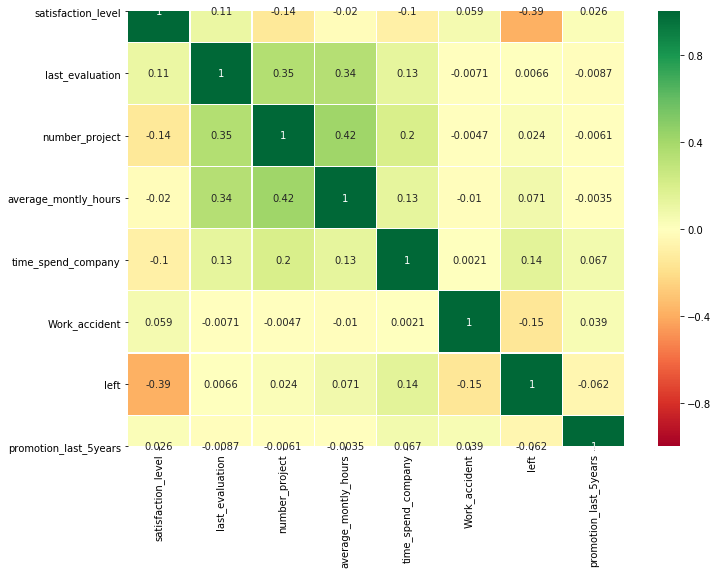

In [117]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2, 
            vmin=-1, vmax=1, center= 0,square=True)
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,8)
plt.show()

### 4 Визуализировать несколько взаимосвязей между переменными

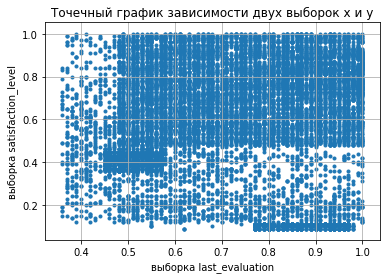

In [118]:
le = df['last_evaluation']
sl = df['satisfaction_level']
plt.xlabel('выборка last_evaluation')
plt.ylabel('выборка satisfaction_level')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(le, sl, marker='.')

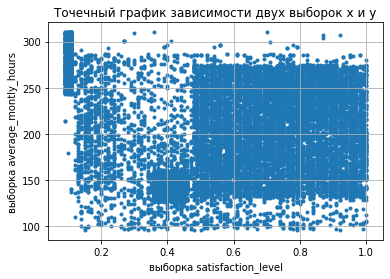

In [119]:
sl = df['satisfaction_level']
amh = df['average_montly_hours']
plt.xlabel('выборка satisfaction_level')
plt.ylabel('выборка average_montly_hours')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(sl, amh, marker='.')

### 5 С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [120]:
# нулевая гипотеза: не имеется стат различие труд стажа для выборок с низкими и ненизкими зп
salary_low = df[df['salary']=='low']['time_spend_company']

salary_non_low = df[df['salary']!='low']['time_spend_company']

print(stats.ttest_ind(salary_low, salary_non_low))

Ttest_indResult(statistic=-4.915962847170633, pvalue=8.928128475051479e-07)


p-value близко к 0, что меньше стандартной альфа ошибки 0.05, 
поэтому мы не принимаем нулевую гипотезу и можем сказать, 
что имеется статистическое различие между стажем сотрудников с низкой зп и сотрудников с не низкой.

### 6  Рассчитать сколько работников работает в каждом департаменте

In [121]:
df.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

### 7  Показать распределение сотрудников по зарплатам

In [122]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

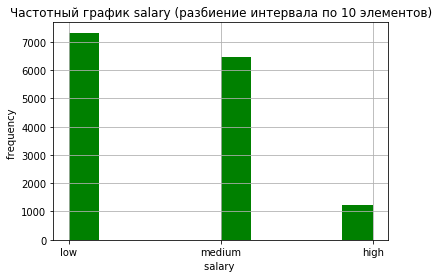

In [123]:
n, bins, patches = plt.hist(df['salary'], 10, facecolor='g')

plt.xlabel('salary ')
plt.ylabel('frequency ')
plt.title('Частотный график salary (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

### 8  Показать распределение сотрудников по зарплатам совместно с департаментами

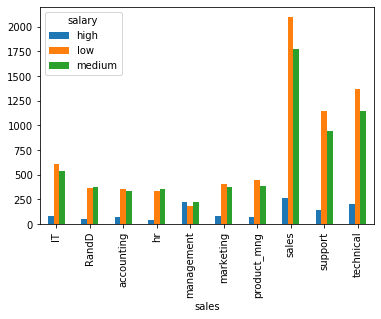

In [124]:
salary_by_dep = df.groupby([df.sales, df.salary]).salary.count()
salary_by_dep.unstack().plot(kind='bar')

### 9 Сколько сотрудников покинули компанию

In [125]:
df[df['left']==1].left.count()

3571

### 10 Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [126]:
# нулевая гипотеза: не имеется стат различие ухода из компании для выборок с низкими и ненизкими зп
salary_low = df[df['salary']=='low']['left']

salary_non_low = df[df['salary']!='low']['left']

print(stats.ttest_ind(salary_low, salary_non_low))

Ttest_indResult(statistic=16.650146684409187, pvalue=1.0799936831829457e-61)


p-value близко к 0, что меньше стандартной альфа ошибки 0.05, 
поэтому мы не принимаем нулевую гипотезу. 
значит - имеется стат различие ухода из компании для выборок с низкими и ненизкими зп

In [127]:
# нулевая гипотеза: не имеется стат различие ухода из компании для выборок с переработками выше срднего(200) и ниже или равно ср
average_montly_hours_left = df[df['average_montly_hours']>200]['left']

average_montly_hours_non_left = df[df['average_montly_hours']<=200]['left']

print(stats.ttest_ind(average_montly_hours_left, average_montly_hours_non_left))

Ttest_indResult(statistic=5.193359906168156, pvalue=2.09234273556547e-07)


p-value близко к 0, что меньше стандартной альфа ошибки 0.05, 
поэтому мы не принимаем нулевую гипотезу. 
значит - имеется стат различие ухода из компании для выборок с переработками выше срднего(200) и ниже или равно ср

### 11 Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте